# **Preparing Data for Customer Analytics Model**

- `student_id`:	A unique ID for each student.
- `city`:	A code for the city the student lives in.
- `city_development_index`:	A scaled development index for the city.
- `gender`:	The student's gender.
- `relevant_experience`:	An indicator of the student's work relevant experience.
- `enrolled_university`:	The type of university course enrolled in (if any).
- `education_level`:	The student's education level.
- `major_discipline`:	The educational discipline of the student.
- `experience`:	The student's total work experience (in years).
- `company_size`:	The number of employees at the student's current employer.
- `last_new_job`:	The number of years between the student's current and previous jobs.
- `training_hours`:	The number of hours of training completed.
- `job_change`:	An indicator of whether the student is looking for a new job (1) or not (0).

## Exploratory data analysis


In [17]:
# import packages
import pandas as pd

# Load the dataset
df_jobs = pd.read_csv("/content/customer_train.csv")

df_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949.0,city_103,0.92,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1.0
1,29725.0,city_40,0.7759999999999999,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0
2,11561.0,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0.0
3,33241.0,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1.0
4,666.0,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0.0


In [18]:
# check the data type of each column
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27712 entries, 0 to 27711
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              27711 non-null  float64
 1   city                    27712 non-null  object 
 2   city_development_index  27712 non-null  object 
 3   gender                  21137 non-null  object 
 4   relevant_experience     27712 non-null  object 
 5   enrolled_university     27151 non-null  object 
 6   education_level         27045 non-null  object 
 7   major_discipline        23662 non-null  object 
 8   experience              27611 non-null  object 
 9   company_size            19135 non-null  object 
 10  company_type            18819 non-null  object 
 11  last_new_job            27104 non-null  object 
 12  training_hours          27711 non-null  float64
 13  job_change              27711 non-null  float64
dtypes: float64(3), object(11)
memory usage

In [19]:
# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {df_jobs.shape[0]}")
print(f"Number of columns: {df_jobs.shape[1]}")

Number of rows: 27712
Number of columns: 14


In [27]:
# Check for missing values
missing_values = df_jobs.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
student_id                   0
city                         0
city_development_index       0
gender                    1159
relevant_experience          0
enrolled_university         40
education_level             38
major_discipline           342
experience                   0
company_size                 0
company_type               219
last_new_job                66
training_hours               0
job_change                   0
dtype: int64


In [28]:
# Iterate through columns and print the number of unique labels
for col in df_jobs.columns:
    unique_labels = df_jobs[col].nunique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'student_id': 2360
Number of unique labels in column 'city': 97
Number of unique labels in column 'city_development_index': 76
Number of unique labels in column 'gender': 3
Number of unique labels in column 'relevant_experience': 2
Number of unique labels in column 'enrolled_university': 3
Number of unique labels in column 'education_level': 5
Number of unique labels in column 'major_discipline': 6
Number of unique labels in column 'experience': 21
Number of unique labels in column 'company_size': 3
Number of unique labels in column 'company_type': 4
Number of unique labels in column 'last_new_job': 6
Number of unique labels in column 'training_hours': 232
Number of unique labels in column 'job_change': 2


In [29]:
df_jobs['gender'].unique()

[NaN, 'Male', 'Female', 'Other']
Categories (4, object): ['10000+', 'Female', 'Male', 'Other']

## Converting data types

In [20]:
# check the ordinal column unique content
print(df_jobs['relevant_experience'].unique())
print(df_jobs['enrolled_university'].unique())
print(df_jobs['education_level'].unique())
print(df_jobs['experience'].unique())
print(df_jobs['company_size'].unique())
print(df_jobs['last_new_job'].unique())

['Has relevant experience' 'No relevant experience' 'Pvt Ltd']
['no_enrollment' 'Full time course' nan 'Part time course' '>4']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School' '53']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10-49' '100-499'
 '500-999']
['1' '>4' 'never' '4' '3' '2' nan]


## Converting ordered categories


In [21]:
# Create a dictionary of columns containing ordered categorical data
ordered_cats = {
    'relevant_experience': ['No relevant experience', 'Has relevant experience'],
    'enrolled_university': ['no_enrollment', 'Part time course', 'Full time course'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1'] + list(map(str, range(1, 21))) + ['>20'],
    'company_size': ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4']
}

In [22]:
# Loop through DataFrame columns to efficiently change data types
for col in df_jobs:

    # Convert integer columns to int32
    if df_jobs[col].dtype == 'int':
        df_jobs[col] = df_jobs[col].astype('int32')

    # Convert float columns to float16
    elif df_jobs[col].dtype == 'float':
        df_jobs[col] = df_jobs[col].astype('float16')

    # Convert columns containing ordered categorical data to ordered categories using dict
    elif col in ordered_cats.keys():
        category = pd.CategoricalDtype(ordered_cats[col], ordered=True)
        df_jobs[col] = df_jobs[col].astype(category)

    # Convert remaining columns to standard categories
    else:
        df_jobs[col] = df_jobs[col].astype('category')


In [23]:
# re-check the data type after converting
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27712 entries, 0 to 27711
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              27711 non-null  float16 
 1   city                    27712 non-null  category
 2   city_development_index  27712 non-null  category
 3   gender                  21137 non-null  category
 4   relevant_experience     27711 non-null  category
 5   enrolled_university     27150 non-null  category
 6   education_level         27044 non-null  category
 7   major_discipline        23662 non-null  category
 8   experience              27611 non-null  category
 9   company_size            19135 non-null  category
 10  company_type            18819 non-null  category
 11  last_new_job            27104 non-null  category
 12  training_hours          27711 non-null  float16 
 13  job_change              27711 non-null  float16 
dtypes: category(11), float

## Reordering columns

In [24]:
# Filter students with 10 or more years experience at companies with at least 1000 employees
df_jobs = df_jobs[(ds_jobs['experience'] >= '10') & (df_jobs['company_size'] >= '1000-4999')]

In [25]:
# check the company size filter
df_jobs.groupby(['company_size']).size()

company_size
<10             0
10-49           0
50-99           0
100-499         0
500-999         0
1000-4999    1871
5000-9999     807
10000+       2877
dtype: int64

In [26]:
# check the experience filter
df_jobs.groupby(['experience']).size()

experience
<1       69
1         0
2       170
3       237
4       299
5       355
6       382
7       300
8       253
9       285
10      360
11      221
12      164
13      150
14      210
15      255
16      178
17      129
18      100
19      117
20       66
>20    1255
dtype: int64

Invalid entries in 'city_development_index':
        student_id  city city_development_index  gender relevant_experience  \
19158         NaN  STEM                    >20  10000+             Pvt Ltd   

      enrolled_university education_level major_discipline experience  \
19158                  >4              53                0        NaN   

      company_size company_type last_new_job  training_hours  job_change  
19158          NaN          NaN          NaN             NaN         NaN  


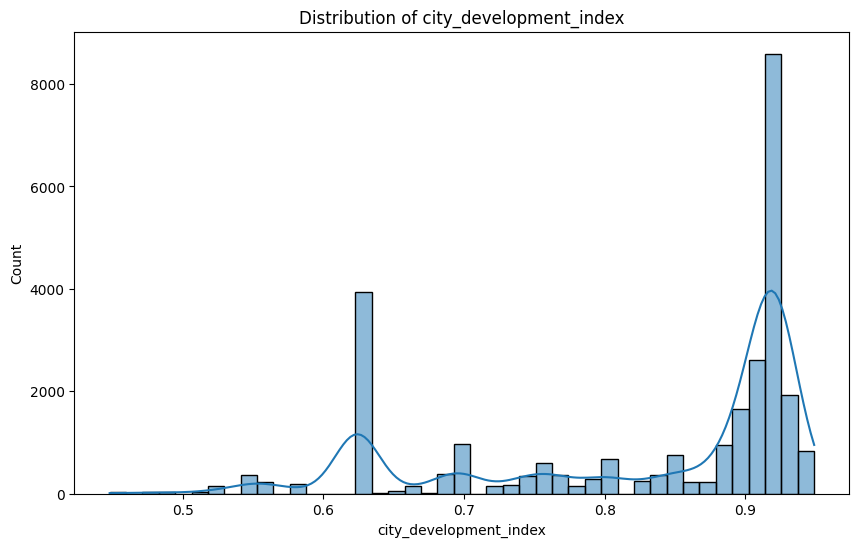

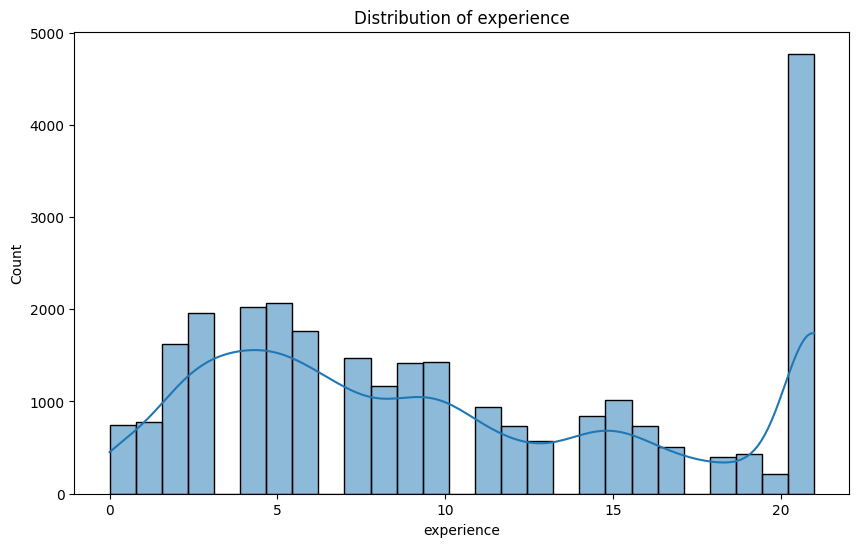

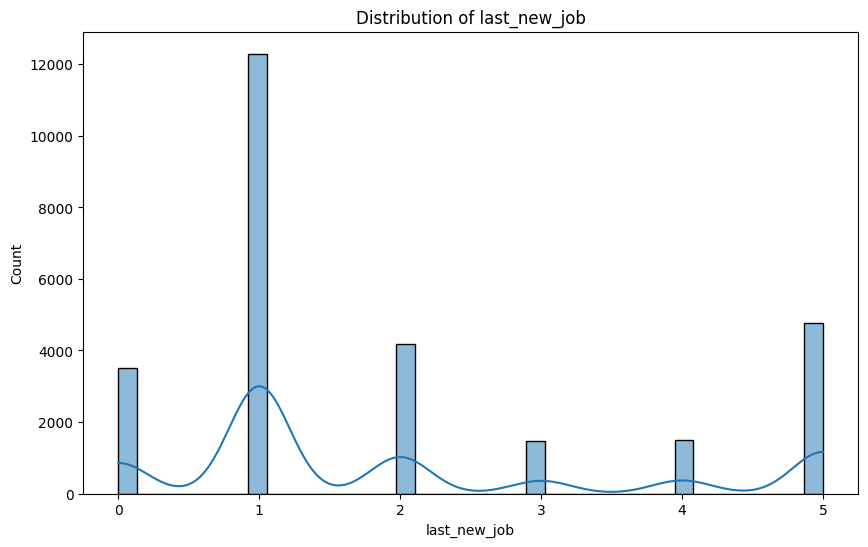

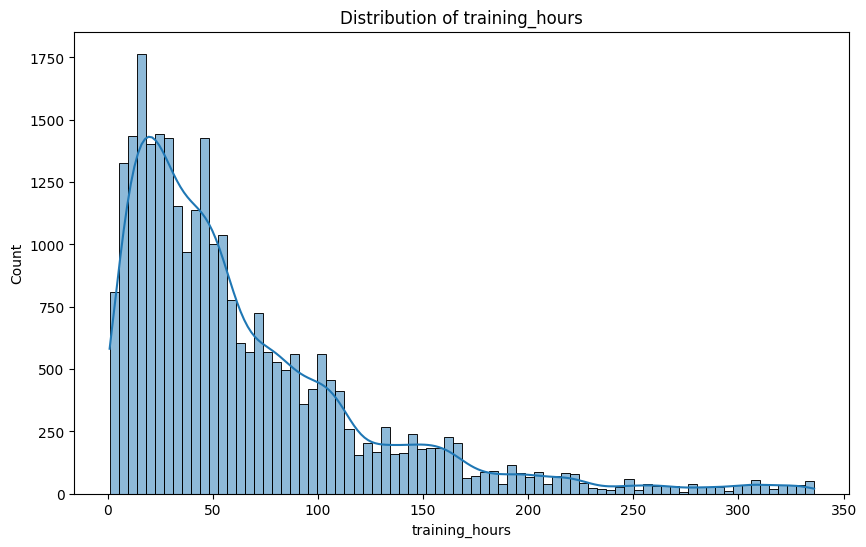

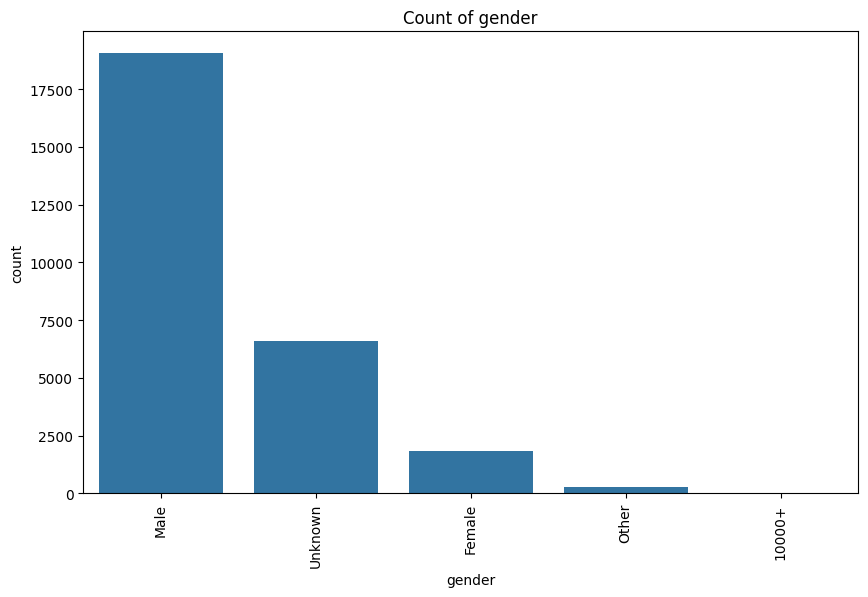

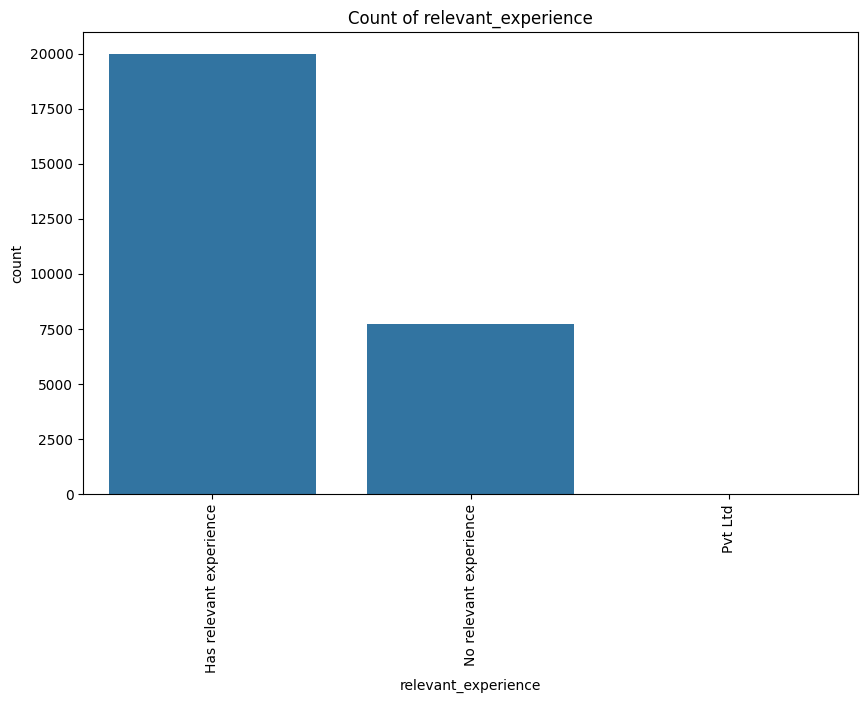

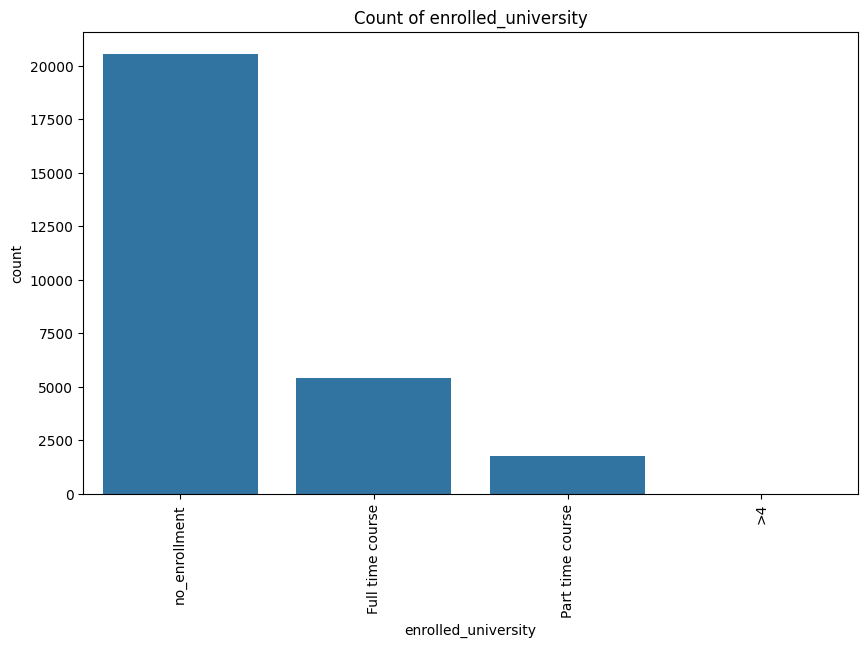

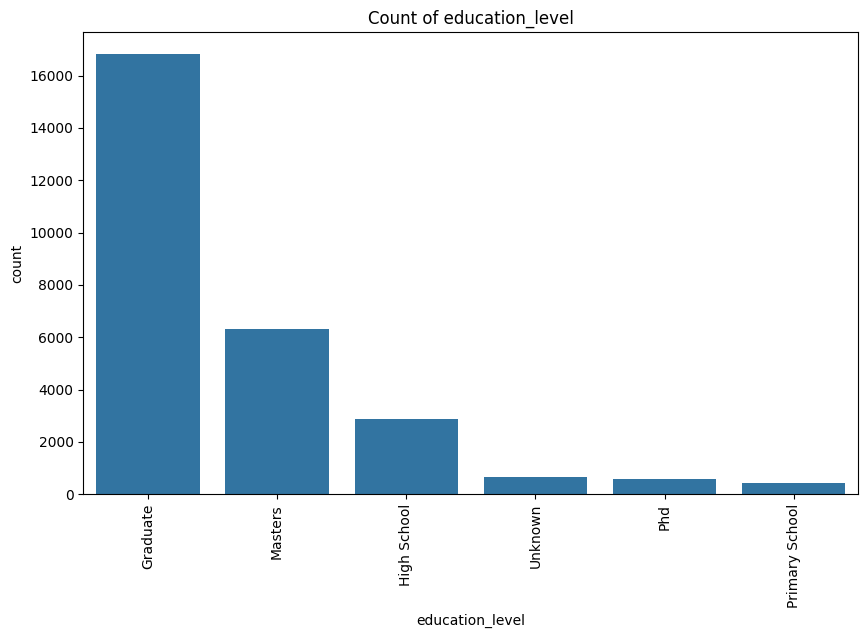

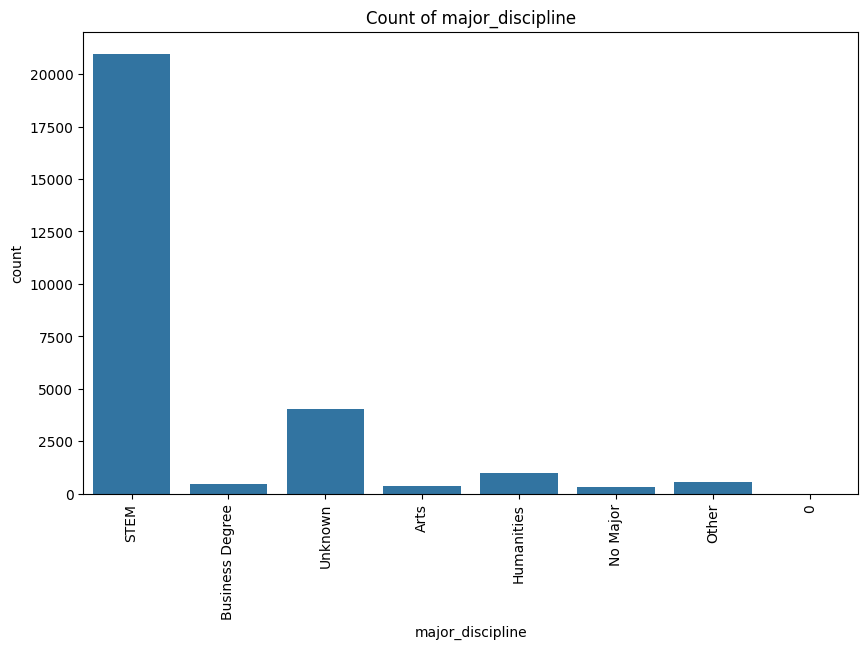

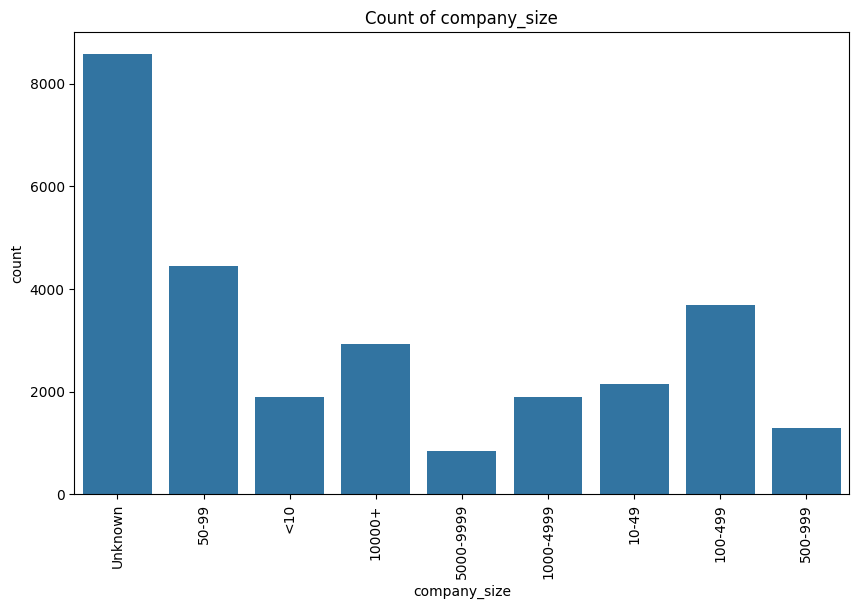

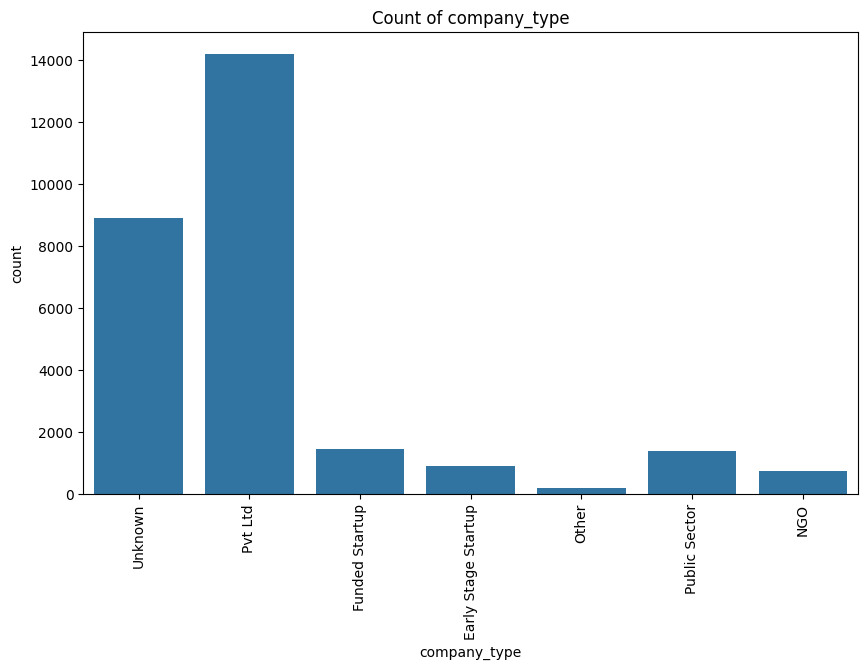

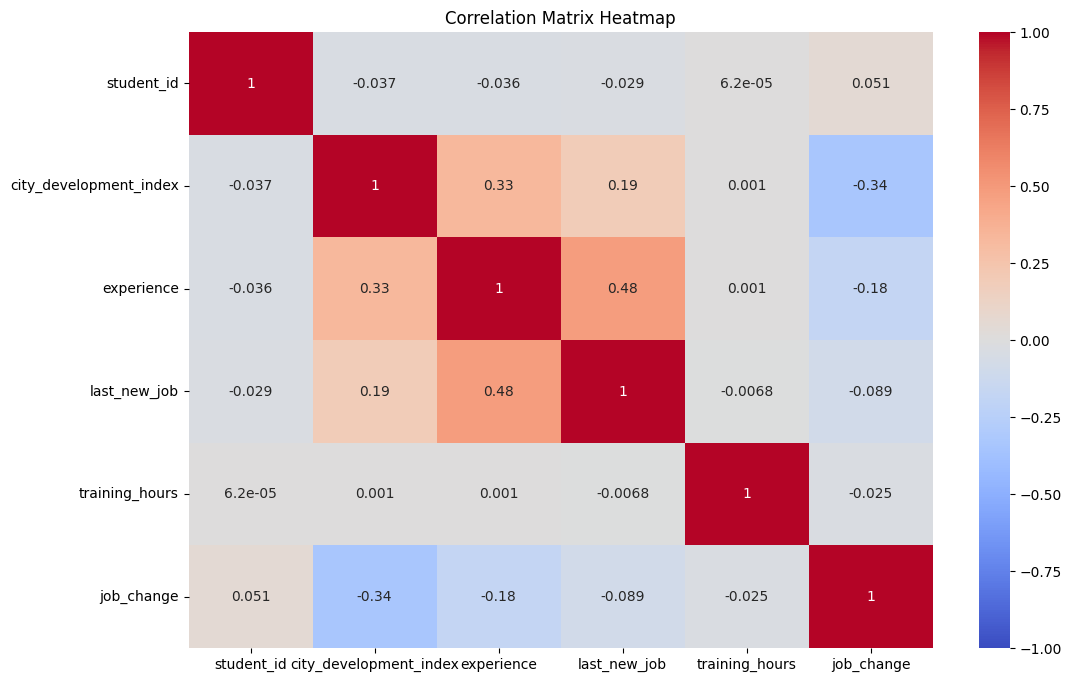

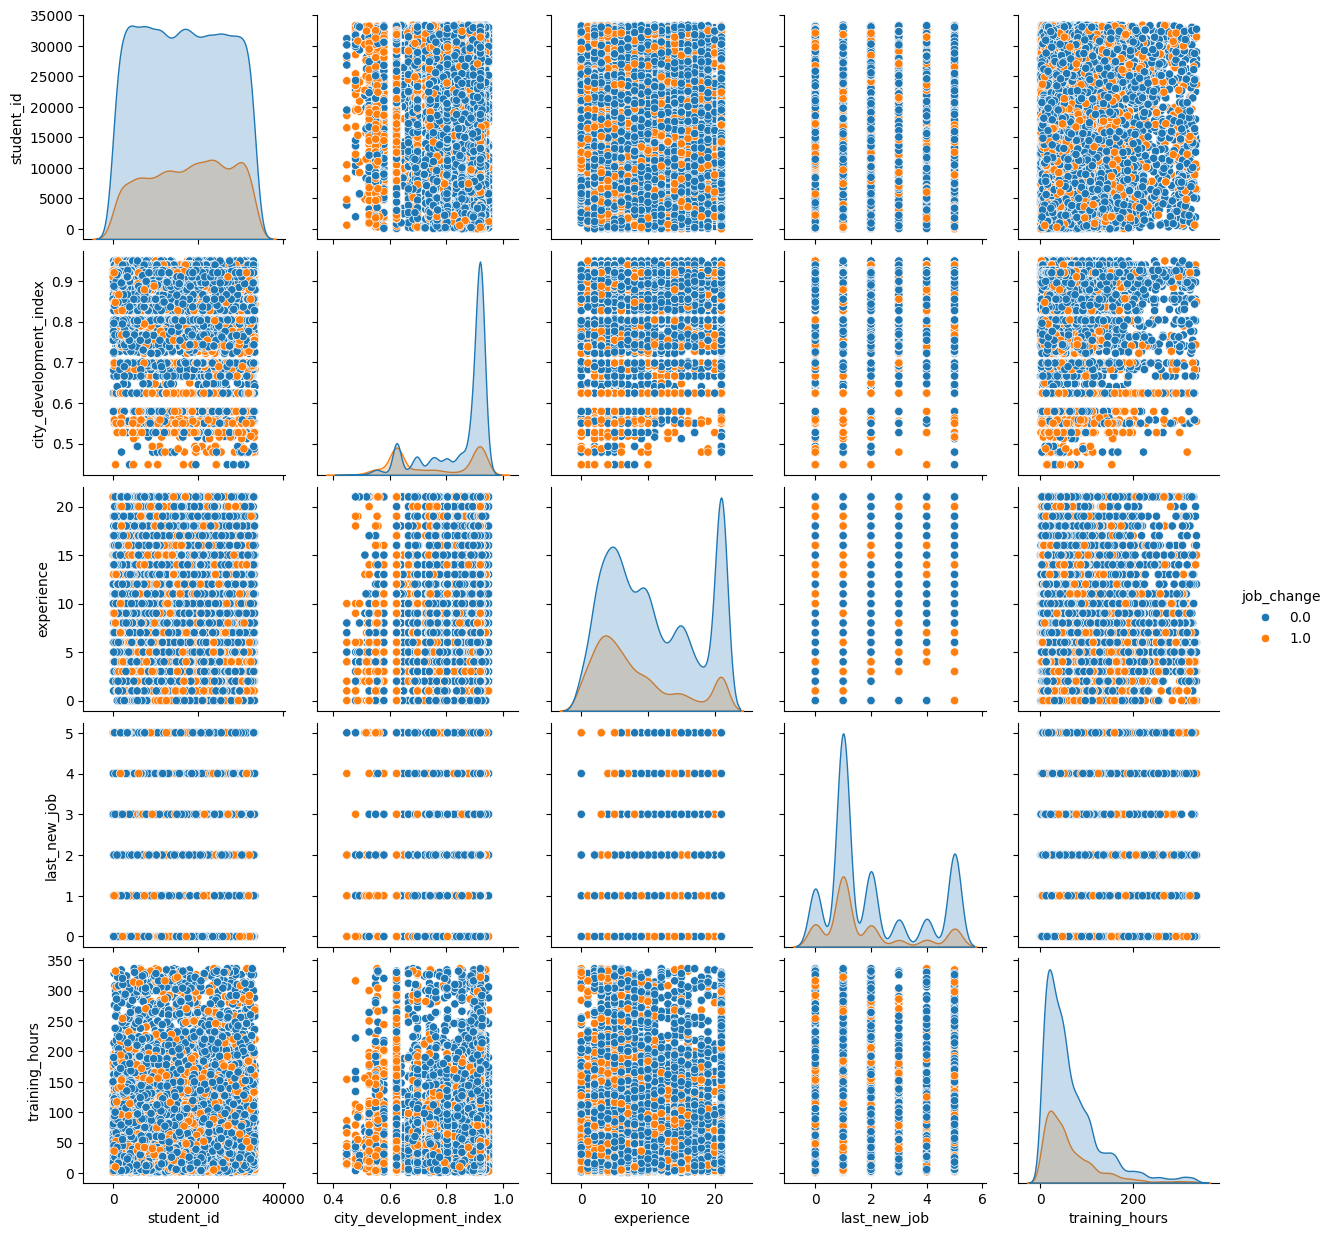

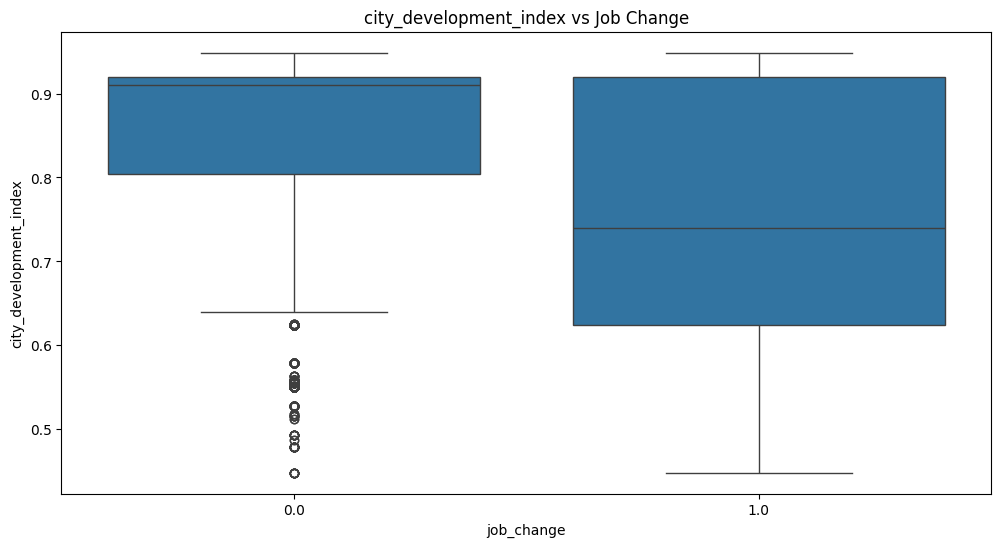

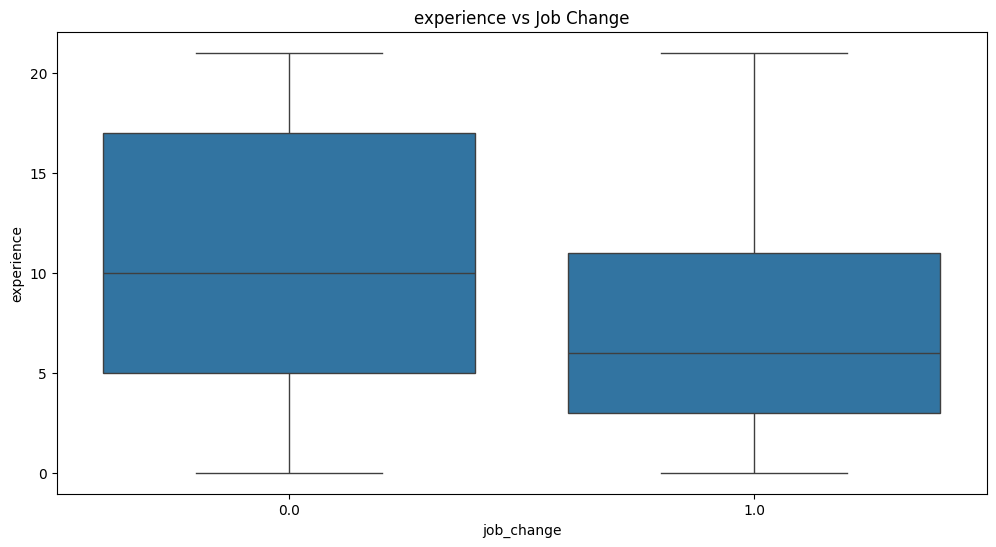

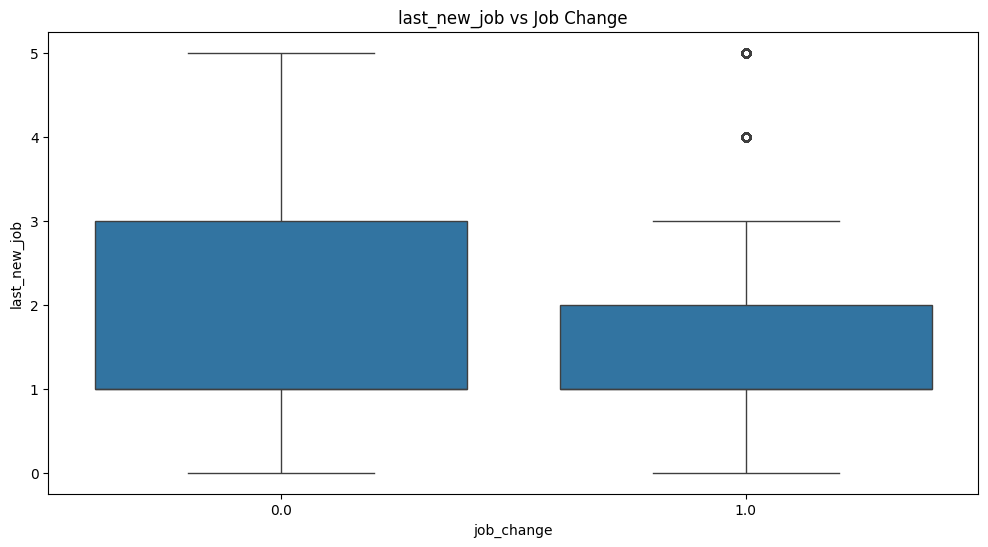

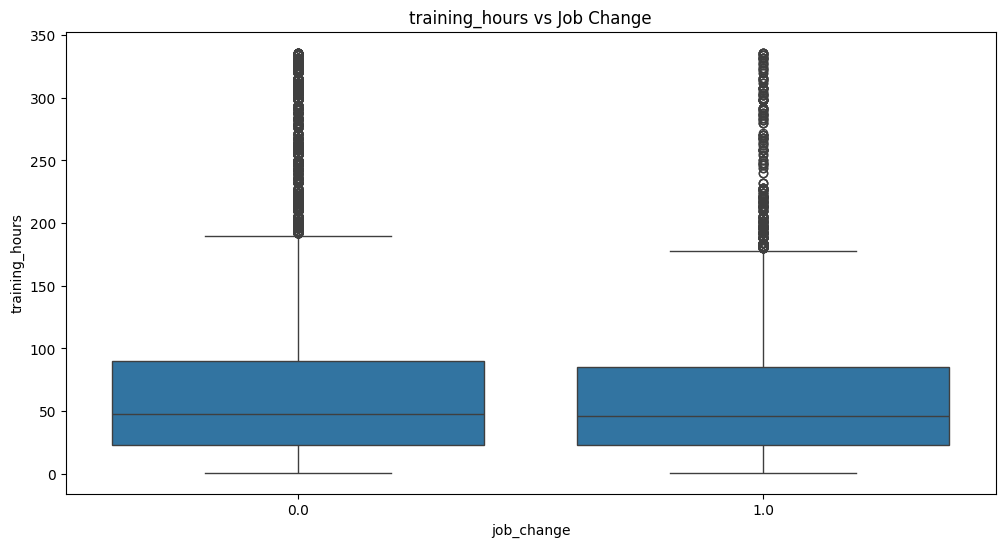

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/customer_train.csv')

# Check for non-numeric values in 'city_development_index'
invalid_entries = data[~data['city_development_index'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print("Invalid entries in 'city_development_index':\n", invalid_entries)

# Handling invalid entries in 'city_development_index'
data['city_development_index'] = pd.to_numeric(data['city_development_index'], errors='coerce')
data['city_development_index'].fillna(data['city_development_index'].mean(), inplace=True)

# Replace invalid 'education_level' entry
data['education_level'].replace('53', np.nan, inplace=True)

# Convert 'experience' and 'last_new_job' to numerical, handling special cases
experience_mapping = {'<1': 0, '>20': 21}
data['experience'] = data['experience'].replace(experience_mapping).astype(float)
last_new_job_mapping = {'never': 0, '>4': 5}
data['last_new_job'] = data['last_new_job'].replace(last_new_job_mapping).astype(float)

# Handling missing values
data['gender'].fillna('Unknown', inplace=True)
data['enrolled_university'].fillna('no_enrollment', inplace=True)
data['education_level'].fillna('Unknown', inplace=True)
data['major_discipline'].fillna('Unknown', inplace=True)
data['company_size'].fillna('Unknown', inplace=True)
data['company_type'].fillna('Unknown', inplace=True)
data['last_new_job'].fillna(data['last_new_job'].median(), inplace=True)

# Ensure 'city_development_index' is a float (already handled above)

# Data Visualization

# Plot Distributions of Numerical Features
numerical_features = ['city_development_index', 'experience', 'last_new_job', 'training_hours']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Bar plots of Categorical Features
categorical_features = ['gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
    plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plots to visualize relationships between features
sns.pairplot(data, hue='job_change')
plt.show()

# Box plots of numerical features across different categories
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='job_change', y=feature, data=data)
    plt.title(f'{feature} vs Job Change')
    plt.show()

# Saving the cleaned data
data.to_csv('cleaned_data.csv', index=False)